In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder


In [7]:
df = pd.read_csv("data.csv")

In [8]:
df

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106873,106873,mercedes-benz,Mercedes-Benz C 350,black,06/2007,2007,8000,200,272,Automatic,Petrol,"9,7 l/100 km",232 g/km,306500.0,7G-TRONIC Avantgarde Sport Edition
106874,106874,mercedes-benz,Mercedes-Benz A 170,black,08/2007,2007,5500,85,116,Manual,Petrol,"6,6 l/100 km",157 g/km,168000.0,Avantgarde
106875,106875,mercedes-benz,Mercedes-Benz B 200,black,12/2007,2007,5850,100,136,Manual,Petrol,"7,5 l/100 km",180 g/km,177000.0,B -Klasse
106876,106876,mercedes-benz,Mercedes-Benz A 150,black,12/2007,2007,3500,70,95,Manual,Petrol,"6,2 l/100 km",148 g/km,139000.0,Classic Edition 10


In [28]:
# Choose a categorical column to one-hot encode (replace 'categorical_column' with the actual column name)
categorical_column_to_encode = 'transmission_type'	,'fuel_type'

# Use one-hot encoding
df_encoded = pd.get_dummies(df, columns=['transmission_type'	,'fuel_type'], prefix=['transmission_type'	,'fuel_type'])

# Display the Data with one-hot encoding
print(df_encoded.head())

   Unnamed: 0       brand              model  color registration_date    year  \
0           0  alfa-romeo     Alfa Romeo GTV    red           10/1995  1995.0   
1           1  alfa-romeo     Alfa Romeo 164  black           02/1995  1995.0   
2           2  alfa-romeo  Alfa Romeo Spider  black           02/1995  1995.0   
3           3  alfa-romeo  Alfa Romeo Spider  black           07/1995  1995.0   
4           4  alfa-romeo     Alfa Romeo 164    red           11/1996  1996.0   

   price_in_euro power_kw power_ps  fuel_consumption_l_100km  ...  \
0         1300.0      148      201                       NaN  ...   
1        24900.0      191      260                       NaN  ...   
2         5900.0      110      150                       NaN  ...   
3         4900.0      110      150                       NaN  ...   
4        17950.0      132      179                       NaN  ...   

  fuel_type_Diesel  fuel_type_Diesel Hybrid fuel_type_Electric  \
0                0              

In [74]:
# Display summary statistics
df.describe()


,Unnamed: 0,year,price_in_euro,mileage_in_km,car_model_encoded
count,106773.000000,106773.000000,1.067730e+05,1.067730e+05,106773.000000
mean,53435.800043,2015.908685,2.859135e+04,8.881379e+04,292.746565
std,30858.245389,5.835011,4.735026e+04,8.212081e+04,196.202113
min,0.000000,1995.000000,1.500000e+02,0.000000e+00,0.000000
25%,26707.000000,2013.000000,1.199900e+04,2.586600e+04,97.000000
50%,53448.000000,2018.000000,1.999000e+04,7.000000e+04,335.000000
75%,80160.000000,2020.000000,3.190000e+04,1.331750e+05,448.000000
max,106876.000000,2023.000000,5.890500e+06,3.800000e+06,746.000000


In [75]:
# Check for missing values
df.isnull().sum()

# Drop rows with missing values
df_cleaned = df.dropna()
df

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_g_km,mileage_in_km,offer_description,car_model_encoded
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995.0,1300.0,148,201,Manual,Petrol,260 g/km,160500.0,2.0 V6 TB,14
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995.0,24900.0,191,260,Manual,Petrol,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA",7
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995.0,5900.0,110,150,Unknown,Petrol,- (g/km),129000.0,ALFA ROME 916,18
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995.0,4900.0,110,150,Manual,Petrol,225 g/km,189500.0,2.0 16V Twin Spark L,18
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996.0,17950.0,132,179,Manual,Petrol,- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106872,106872,mercedes-benz,Mercedes-Benz CLS 350,black,01/2007,2007.0,14999.0,215,292,Automatic,Petrol,- (g/km),188000.0,CGI 7G-TRONIC,658
106873,106873,mercedes-benz,Mercedes-Benz C 350,black,06/2007,2007.0,8000.0,200,272,Automatic,Petrol,232 g/km,306500.0,7G-TRONIC Avantgarde Sport Edition,629
106874,106874,mercedes-benz,Mercedes-Benz A 170,black,08/2007,2007.0,5500.0,85,116,Manual,Petrol,157 g/km,168000.0,Avantgarde,608
106875,106875,mercedes-benz,Mercedes-Benz B 200,black,12/2007,2007.0,5850.0,100,136,Manual,Petrol,180 g/km,177000.0,B -Klasse,616


In [76]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns= ['transmission_type','fuel_type'	], drop_first=True)
df_encoded

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,fuel_consumption_g_km,...,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Electric,fuel_type_Ethanol,fuel_type_Hybrid,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Other,fuel_type_Petrol,fuel_type_Unknown
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995.0,1300.0,148,201,260 g/km,...,0,0,0,0,0,0,0,0,1,0
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995.0,24900.0,191,260,- (g/km),...,0,0,0,0,0,0,0,0,1,0
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995.0,5900.0,110,150,- (g/km),...,0,0,0,0,0,0,0,0,1,0
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995.0,4900.0,110,150,225 g/km,...,0,0,0,0,0,0,0,0,1,0
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996.0,17950.0,132,179,- (g/km),...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106872,106872,mercedes-benz,Mercedes-Benz CLS 350,black,01/2007,2007.0,14999.0,215,292,- (g/km),...,0,0,0,0,0,0,0,0,1,0
106873,106873,mercedes-benz,Mercedes-Benz C 350,black,06/2007,2007.0,8000.0,200,272,232 g/km,...,0,0,0,0,0,0,0,0,1,0
106874,106874,mercedes-benz,Mercedes-Benz A 170,black,08/2007,2007.0,5500.0,85,116,157 g/km,...,0,0,0,0,0,0,0,0,1,0
106875,106875,mercedes-benz,Mercedes-Benz B 200,black,12/2007,2007.0,5850.0,100,136,180 g/km,...,0,0,0,0,0,0,0,0,1,0


In [77]:
# Choose the column to drop
column_to_drop = 'fuel_consumption_l_100km'

# Check if the column exists before droping
if column_to_drop in df.columns:
 # Drop the column
    df = df.drop(column_to_drop, axis=1)
    print(f"The column '{column_to_drop}' done")
else:
    print(f"The column '{column_to_drop}' does not exist ")

# Display the result
print(df.head())

The column 'fuel_consumption_l_100km' does not exist in the DataFrame.
   Unnamed: 0       brand              model  color registration_date    year  \
0           0  alfa-romeo     Alfa Romeo GTV    red           10/1995  1995.0   
1           1  alfa-romeo     Alfa Romeo 164  black           02/1995  1995.0   
2           2  alfa-romeo  Alfa Romeo Spider  black           02/1995  1995.0   
3           3  alfa-romeo  Alfa Romeo Spider  black           07/1995  1995.0   
4           4  alfa-romeo     Alfa Romeo 164    red           11/1996  1996.0   

   price_in_euro power_kw power_ps transmission_type fuel_type  \
0         1300.0      148      201            Manual    Petrol   
1        24900.0      191      260            Manual    Petrol   
2         5900.0      110      150           Unknown    Petrol   
3         4900.0      110      150            Manual    Petrol   
4        17950.0      132      179            Manual    Petrol   

  fuel_consumption_g_km  mileage_in_km       

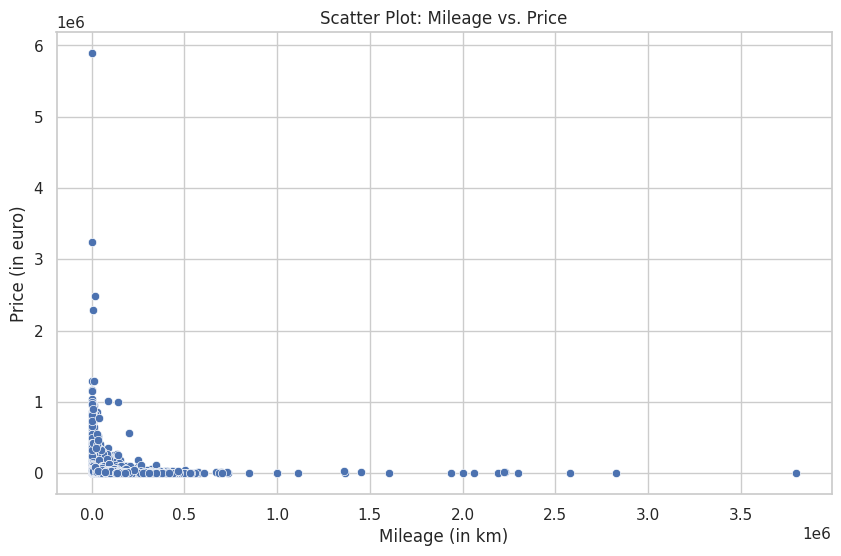

In [78]:
#crate a scatter plot to see how milage influences the price for all years
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage_in_km', y='price_in_euro', data=df)
plt.title('Scatter Plot: Mileage vs. Price')
plt.xlabel('Mileage (in km)')
plt.ylabel('Price (in euro)')
plt.show()

In [63]:
# Remove rows with null values
df_cleaned = df.dropna()


In [64]:
# Remove rows with null values in specific columns
df_cleaned = df.dropna(subset=["brand", "model"])


In [65]:
# Fill null values with a specific value (e.g., 0)
df_filled = df.fillna(0)


In [66]:
# Drop rows with missing values
df = df.dropna(subset=['mileage_in_km', 'year', 'price_in_euro'])


How does mileage influence the pricing of used cars in the German market in the last 5 years ?

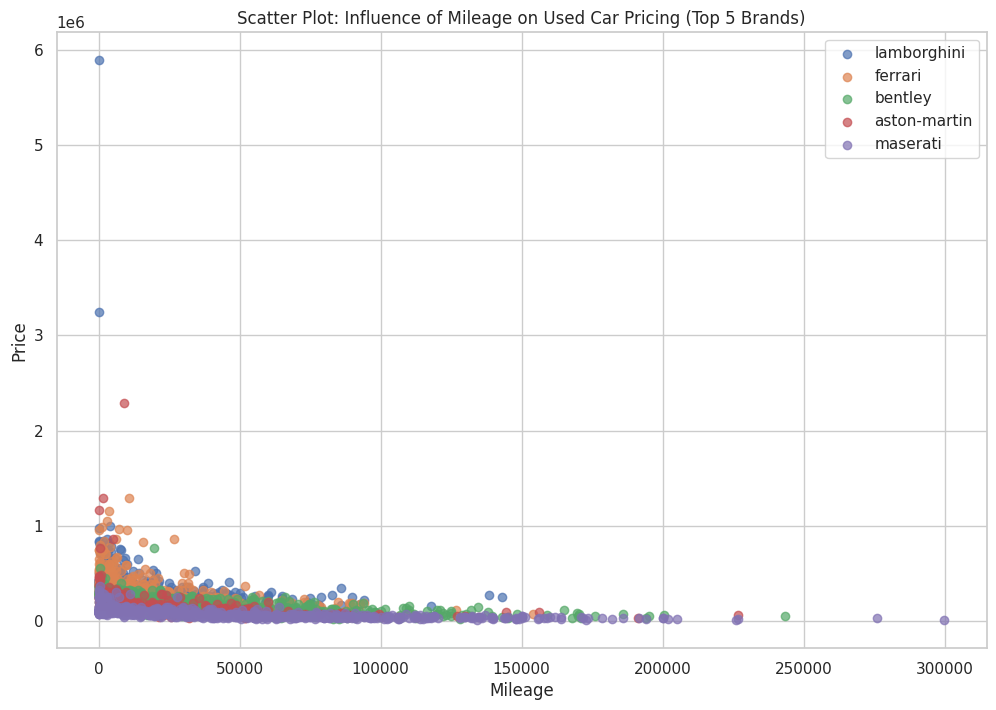

In [67]:
df['mileage_in_km'] = pd.to_numeric(df['mileage_in_km'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['price_in_euro'] = pd.to_numeric(df['price_in_euro'], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=['mileage_in_km', 'year', 'price_in_euro'])

# Assuming you want to focus on the top 5 cars based on some criterion (e.g., highest average price)
top_5_brands = df.groupby('brand')['price_in_euro'].mean().sort_values(ascending=False).head(5).index
df_top_5 = df[df['brand'].isin(top_5_brands)]

# Scatter plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Iterate through the top 5 brands for individual scatter plots
for brand in top_5_brands:
    brand_data = df_top_5[df_top_5['brand'] == brand]
    plt.scatter(brand_data['mileage_in_km'], brand_data['price_in_euro'], label=brand, alpha=0.7)

plt.title('Scatter Plot: Influence of Mileage on Used Car Pricing (Top 5 Brands)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()
plt.show()

What are the average prices of used cars for the top 5 car brands in the German market

<ipython-input-81-ed95716f9a5f>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='brand', y='price_in_euro', data=df_top_5, ci=None)  # ci=None to disable error bars


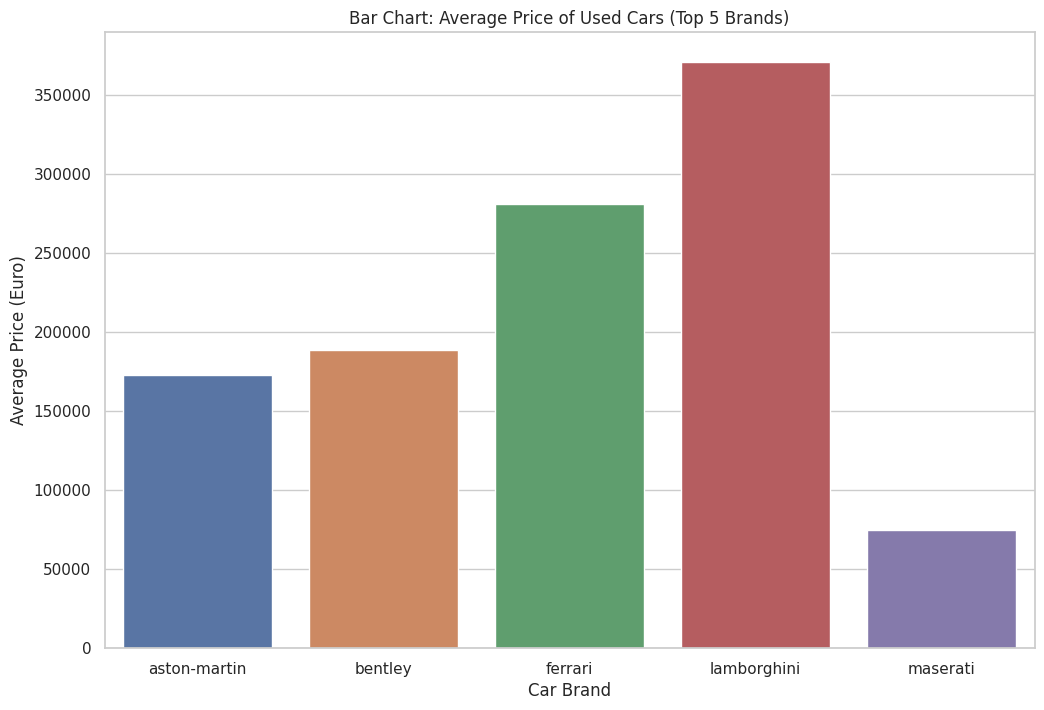

In [81]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Use Seaborn's barplot to show the average price for each brand
sns.barplot(x='brand', y='price_in_euro', data=df_top_5, ci=None)  # ci=None to disable error bars

plt.title('Bar Chart: Average Price of Used Cars (Top 5 Brands)')
plt.xlabel('Car Brand')
plt.ylabel('Average Price (Euro)')
plt.show()

How does the combined effect of fuel consumption efficiency and car model impact the resale value of used cars in the German market?

In [71]:
df['car_model_encoded'] = df['model'].astype('category').cat.codes

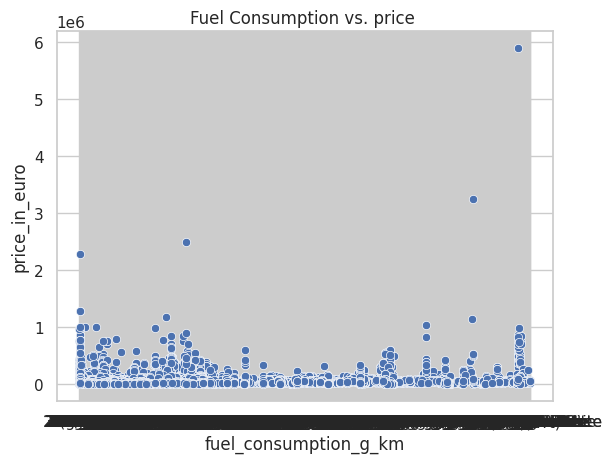

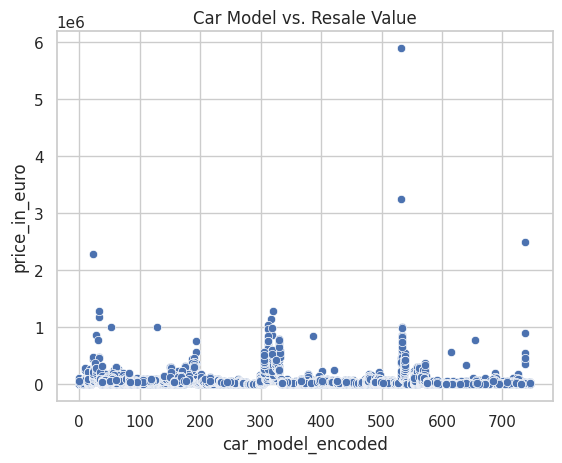

In [73]:
sns.scatterplot(x='fuel_consumption_g_km', y='price_in_euro', data=df)
plt.title('Fuel Consumption vs. price ')
plt.show()

# Scatter plot for car model vs. resale value
sns.scatterplot(x='car_model_encoded', y='price_in_euro', data=df)
plt.title('Car Model vs. Resale Value')
plt.show()

How does the transmission type and fuel type impact the pricing of used cars in the German market

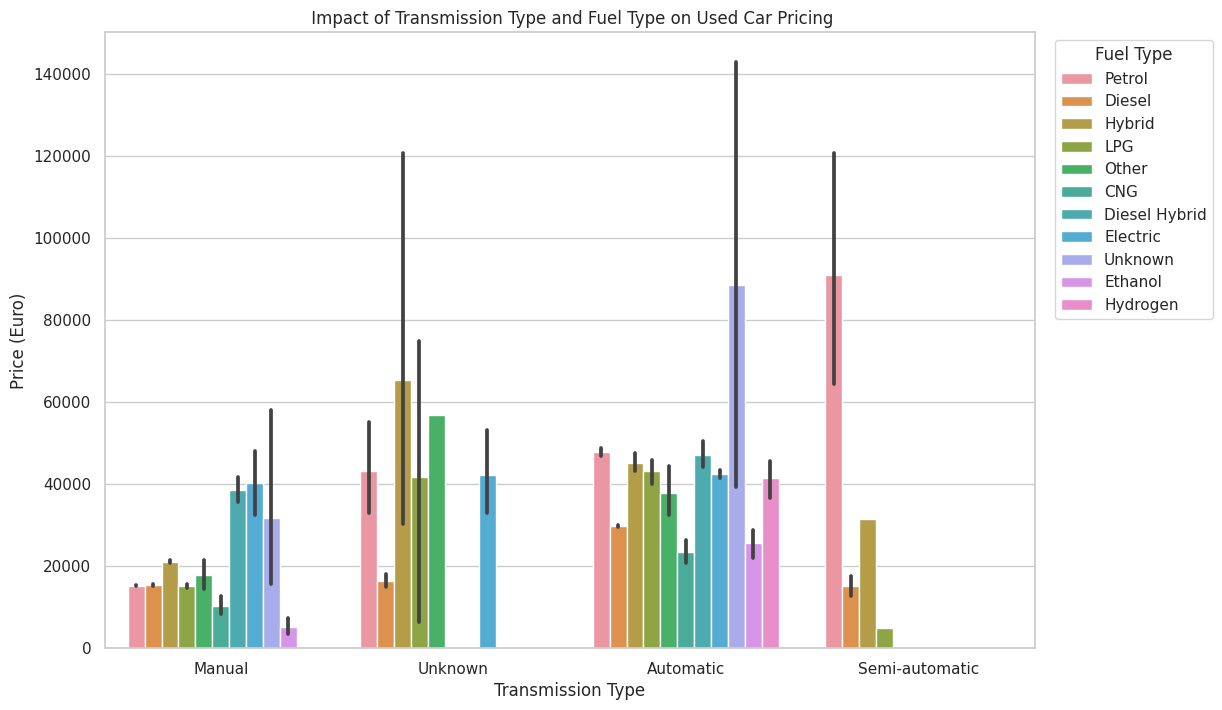

In [87]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Bar plot
sns.barplot(x='transmission_type', y='price_in_euro', hue='fuel_type', data=df)

plt.title(' Impact of Transmission Type and Fuel Type on Used Car Pricing')
plt.xlabel('Transmission Type')
plt.ylabel('Price (Euro)')
plt.legend(title='Fuel Type', loc='upper right',bbox_to_anchor=(1.2, 1))

plt.show()

what is the prefered color for cars in germany

<ipython-input-91-d5d21577cd4a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='color', y='price_in_euro', data=df, ci=None)  # ci=None to disable error bars


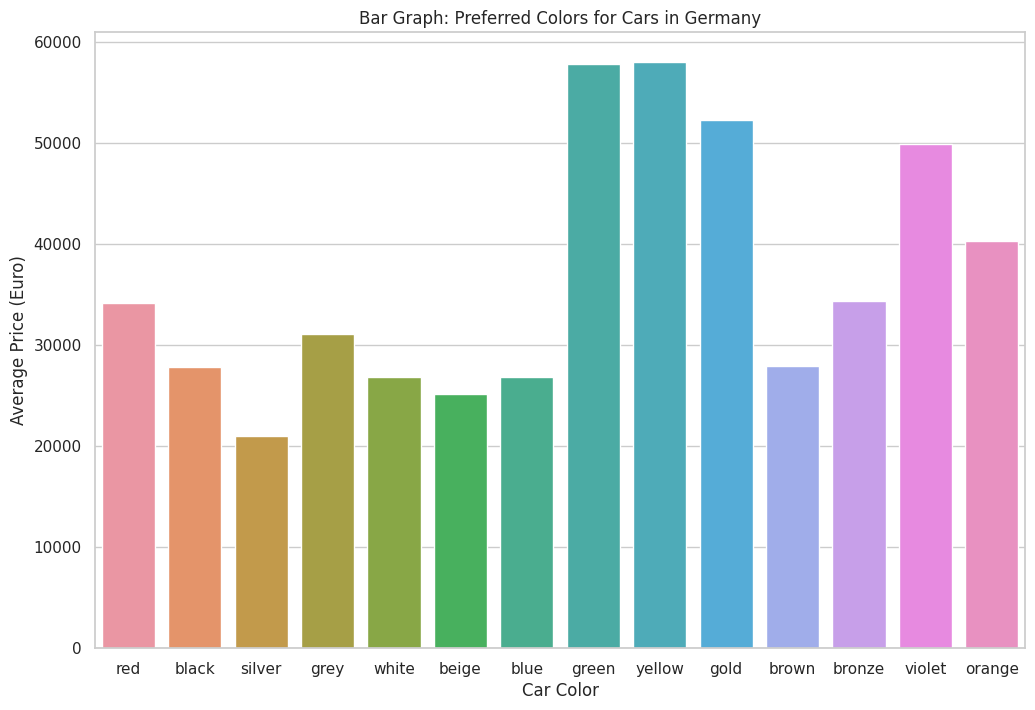

In [91]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Bar plot
sns.barplot(x='color', y='price_in_euro', data=df, ci=None)  # ci=None to disable error bars

plt.title('Bar Graph: Preferred Colors for Cars in Germany')
plt.xlabel('Car Color')
plt.ylabel('Average Price (Euro)')

plt.show()

 is there a correlation between fuel efficiency and pricing, considering factors such as power, transmission type, and mileage?

<ipython-input-96-b207cb3fb06b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['fuel_consumption_g_km', 'price_in_euro', 'power_kw', 'mileage_in_km']].corr()


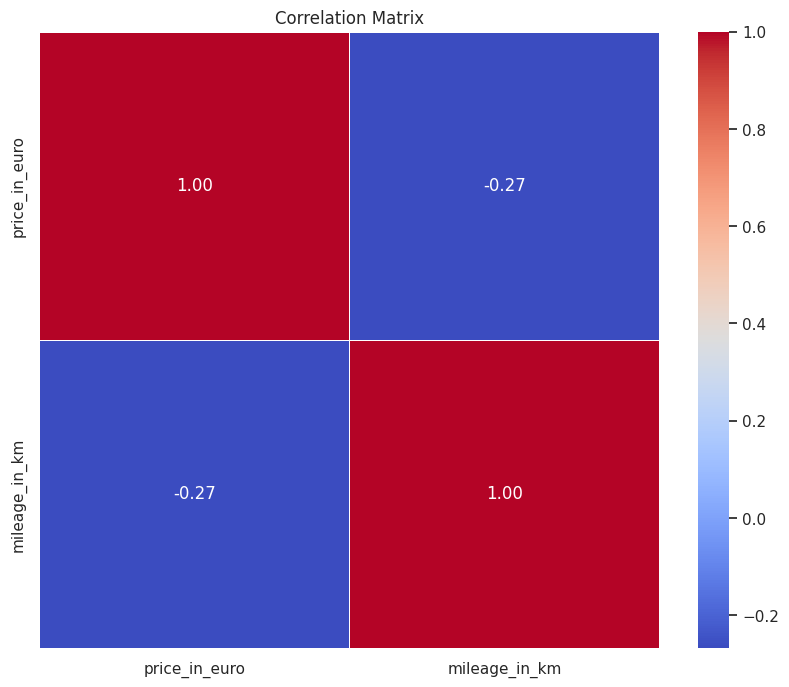

In [96]:
correlation_matrix = df[['fuel_consumption_g_km', 'price_in_euro', 'power_kw', 'mileage_in_km']].corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

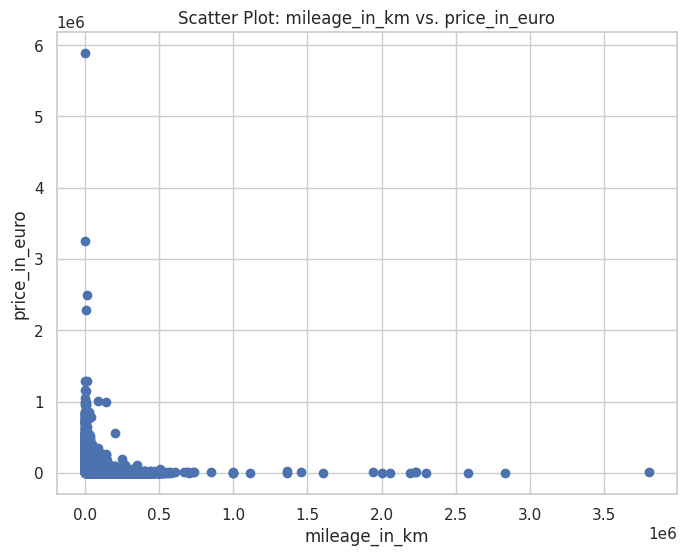

In [98]:
x_variable = 'mileage_in_km'
y_variable = 'price_in_euro'

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(df[x_variable], df[y_variable])
plt.title(f'Scatter Plot: {x_variable} vs. {y_variable}')
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.show()

How does the fuel consumption efficiency of all used cars vary across different brands,and models in the German market

<ipython-input-107-4f9c76ab0702>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fuel_consumption_g_km', y='brand', data=grouped_data, ci=None)


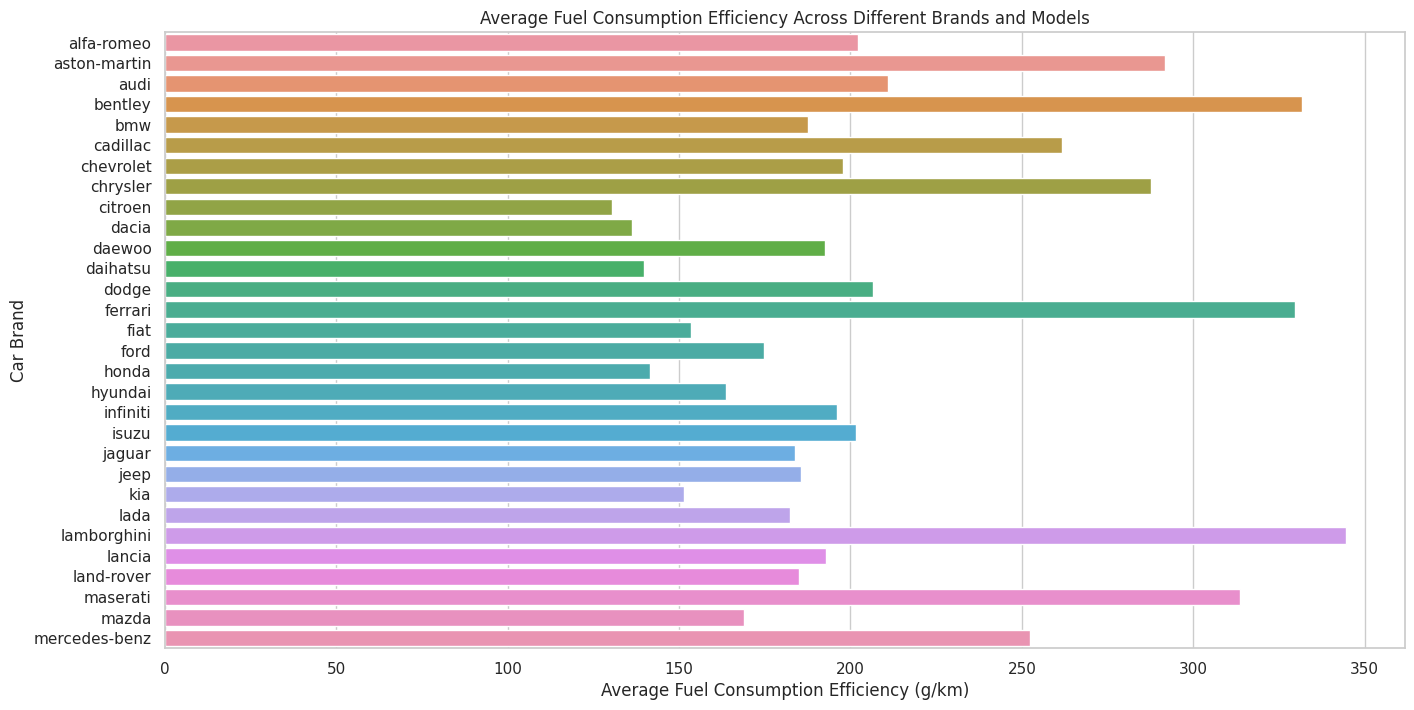

In [107]:
df['fuel_consumption_g_km'] = pd.to_numeric(df['fuel_consumption_g_km'], errors='coerce')

# Group by brand and model, calculate the average fuel consumption efficiency
grouped_data = df.groupby(['brand', 'model'])['fuel_consumption_g_km'].mean().reset_index()

# Bar graph
plt.figure(figsize=(16, 8))
sns.barplot(x='fuel_consumption_g_km', y='brand', data=grouped_data, ci=None)

plt.title('Average Fuel Consumption Efficiency Across Different Brands and Models')
plt.xlabel('Average Fuel Consumption Efficiency (g/km)')
plt.ylabel('Car Brand')
plt.show()

taking color into consideration for top 5 brands and considering color

<ipython-input-104-c0362ef7bb32>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fuel_consumption_g_km', y='brand', hue='color', data=grouped_data, ci=None)


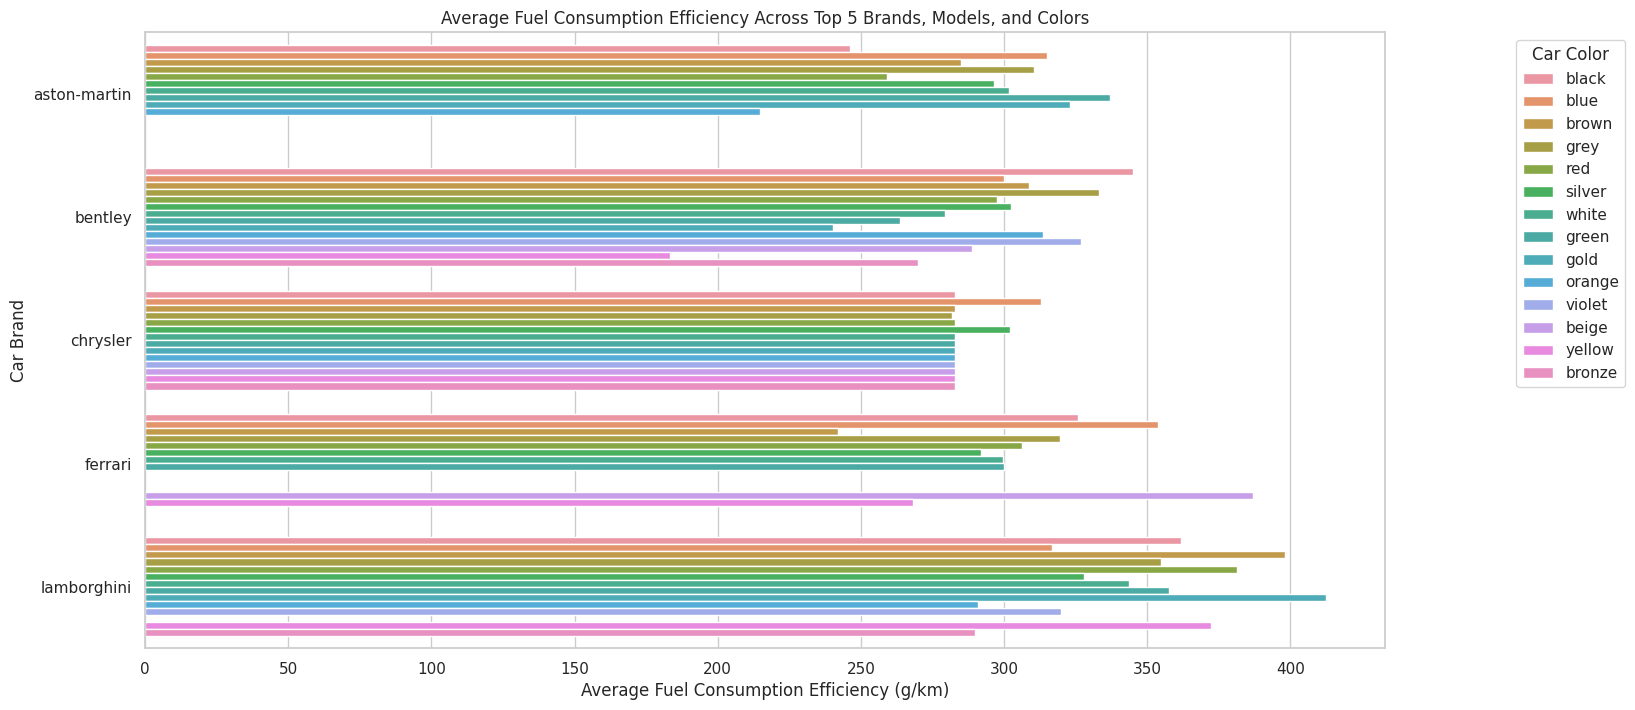

In [104]:
df['fuel_consumption_g_km'] = pd.to_numeric(df['fuel_consumption_g_km'].replace('-', '0'), errors='coerce')

# Calculate the mean fuel consumption efficiency for each brand
brand_mean_fuel = df.groupby('brand')['fuel_consumption_g_km'].mean().sort_values(ascending=False).head(5).index

# Filter the DataFrame for the top 5 brands
df_top_brands = df[df['brand'].isin(brand_mean_fuel)]

# Group by brand, model, and color, calculate the average fuel consumption efficiency
grouped_data = df_top_brands.groupby(['brand', 'model', 'color'])['fuel_consumption_g_km'].mean().reset_index()

# create Bar graph
plt.figure(figsize=(16, 8))
sns.barplot(x='fuel_consumption_g_km', y='brand', hue='color', data=grouped_data, ci=None)

plt.title('Average Fuel Consumption Efficiency Across Top 5 Brands, Models, and Colors')
plt.xlabel('Average Fuel Consumption Efficiency (g/km)')
plt.ylabel('Car Brand')
plt.legend(title='Car Color', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

for top 5 excluding color

<ipython-input-105-4ce53f37dbae>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fuel_consumption_g_km', y='brand', data=grouped_data, ci=None)


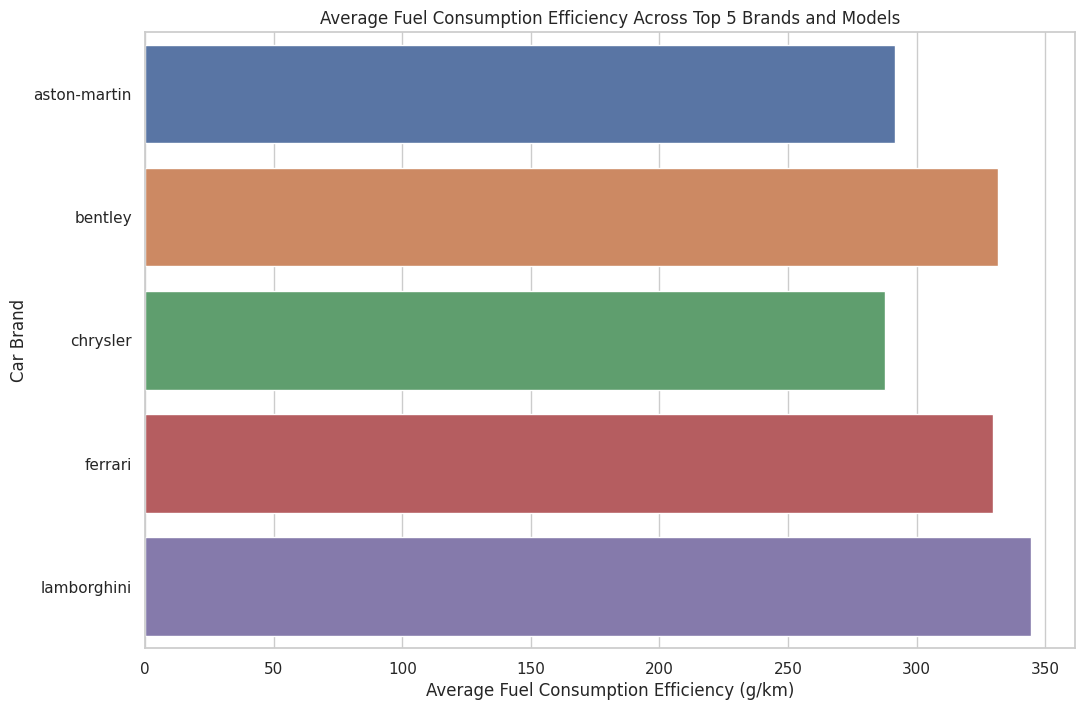

In [105]:
df['fuel_consumption_g_km'] = pd.to_numeric(df['fuel_consumption_g_km'].replace('-', '0'), errors='coerce')

# Calculate the mean fuel consumption efficiency for each brand
brand_mean_fuel = df.groupby('brand')['fuel_consumption_g_km'].mean().sort_values(ascending=False).head(5).index

# Filter the DataFrame for the top 5 brands
df_top_brands = df[df['brand'].isin(brand_mean_fuel)]

# Group by brand and model, calculate the average fuel consumption efficiency
grouped_data = df_top_brands.groupby(['brand', 'model'])['fuel_consumption_g_km'].mean().reset_index()

# create Bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='fuel_consumption_g_km', y='brand', data=grouped_data, ci=None)

plt.title('Average Fuel Consumption Efficiency Across Top 5 Brands and Models')
plt.xlabel('Average Fuel Consumption Efficiency (g/km)')
plt.ylabel('Car Brand')
plt.show()